In [1]:
import os

from torch.utils.data import Dataset
from torchvision.transforms import ToTensor, Resize, Compose

from PIL import Image

In [2]:
class CityScapes(Dataset):
    def __init__(self, root_dir, split='train'):
        super(CityScapes, self).__init__()
        # Save the root directory of the dataset
        self.root_dir = root_dir
        # Reduce the size of the images to 512x1024
        self.transform = Compose([
            Resize((512, 1024)),
            ToTensor()
        ])
        # Image and label directories
        self.image_dir = os.path.join(root_dir, 'images', split)
        self.label_dir = os.path.join(root_dir, 'gtFine', split)
        # Get the list of cities
        self.cities = sorted(os.listdir(self.image_dir))

    def __getitem__(self, idx):
        # Find the city and image index
        for city in self.cities:
            # Get the list of images in the city
            images = os.listdir(os.path.join(self.image_dir, city))
            # Check if the index is in the range of the city
            if idx < len(images):
                # If it is, break the loop
                break
            # Otherwise, subtract the number of images in the city from the index
            # This will move the index to the next city
            idx -= len(images)

        # Load the image and label
        image = self.transform(Image.open(os.path.join(self.image_dir, city, images[idx])))
        label = self.transform(Image.open(os.path.join(self.label_dir, city, images[idx].replace('leftImg8bit', 'gtFine_labelTrainIds'))))
        
        # Return the image and label
        return image, label

    def __len__(self):
        # Sum the number of images in each city
        # This is the total number of images in the dataset
        return sum(len(os.listdir(os.path.join(self.image_dir, city))) for city in self.cities)

## DataClass test

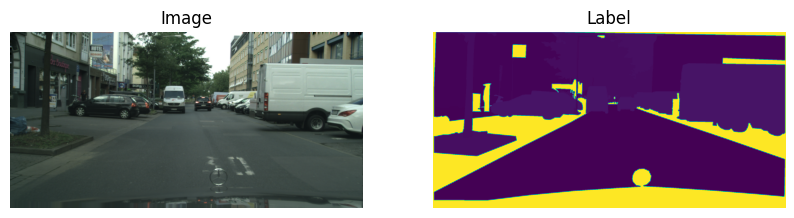

In [3]:
import matplotlib.pyplot as plt

# Create the dataset
dataset = CityScapes(root_dir="Cityspaces")
# Get the first image and label
image, label = dataset[0]
# Convert PyTorch tensor to numpy array for plotting
image = image.permute(1, 2, 0).numpy()
label = label.squeeze().numpy()

# Plot the image and label
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(label, cmap='viridis')
plt.title('Label')
plt.axis('off')
plt.show()
